# **Introduction**
In this notebook,we are able to see how to present meaningful exploratory data analysis

# Business Undestanding
In the aircraft world, there are many selections to pick from when wanting to purchase an airplane either for commercial or private use yet different aircraft industries have their advantages and disadvantages In this analysis we will be able to evaluate risks of different aircrafts in terms of accidents and incident that have occurred in a range of years to be able to analyze and find the one with the lowest risk for the commencing of your new business

## Main Objective
To be able to find the aircraft with the lowest risk

# **Data understanding**

# Description :
The data is from https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses which shows the number of accidents and inncidents from 1962-2023

# Data Importation

In [175]:
#Importing libraries that are needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [187]:
df = pd.read_csv('/content/aircraft.csv', encoding='latin1')



<ipython-input-187-4ee9d5a87c68>:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/aircraft.csv', encoding='latin1')


In [188]:
#This is the first 5 values of the csv file we imported
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/2000
4,20041105X01764,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


# Data wrangling

This is here we are enhancing our data to make it more convinent



*   We have removed some columns like longitude,latitude,Schedule and Air carrier cause most of their cells lack values.
*   If we remove the empty cells in general will have a really small data to work with making us to first remove the colums before removing the ones that lack values







In [189]:
df.drop(columns=['Latitude'],inplace=True)

In [190]:
#we are removing the below columns
df.drop(columns=['Longitude'],inplace=True)


In [191]:

df.drop(columns=['Schedule'],inplace=True)
df.drop(columns=['Air.carrier'],inplace=True)

In [192]:
#We are removing the cells that lack any value
df.dropna(inplace=True)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
8,20020909X01561,Accident,NYC82DA015,1/1/1982,"EAST HANOVER, NJ",United States,N58,HANOVER,Non-Fatal,Substantial,...,Part 91: General Aviation,Business,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,1/1/1982
13,20020917X02134,Accident,FTW82FRA14,1/2/1982,"HEARNE, TX",United States,T72,HEARNE MUNICIPAL,Fatal(1),Destroyed,...,Part 91: General Aviation,Personal,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,2/1/1983
18,20020917X02481,Accident,NYC82DA016,1/2/1982,"GALETON, PA",United States,5G6,CHERRY SPRINGS,Non-Fatal,Substantial,...,Part 91: General Aviation,Personal,0.0,0.0,0.0,1.0,VMC,Taxi,Probable Cause,2/1/1983
20,20020917X01894,Accident,CHI82FEC08,1/2/1982,"YPSILANTI, MI",United States,YIP,WILLOW RUN,Non-Fatal,Substantial,...,Part 91: General Aviation,Instructional,0.0,0.0,0.0,1.0,VMC,Takeoff,Probable Cause,2/1/1983
21,20020917X01776,Accident,CHI82DA020,1/2/1982,"CHARLOTTE, MI",United States,49G,TINKERBELL,Non-Fatal,Substantial,...,Part 91: General Aviation,Personal,0.0,0.0,0.0,2.0,VMC,Approach,Probable Cause,2/1/1983


  

*   We must look at the severity of the injusy the one that are non fatal reduce the risk



In [193]:
#We want to combine all our injuries so we add them up and put them in variable total injuries
df['Total.Injuries']=df['Total.Fatal.Injuries']+df['Total.Serious.Injuries']+df['Total.Minor.Injuries']

In [194]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Total.Injuries
8,20020909X01561,Accident,NYC82DA015,1/1/1982,"EAST HANOVER, NJ",United States,N58,HANOVER,Non-Fatal,Substantial,...,Business,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,1/1/1982,0.0
13,20020917X02134,Accident,FTW82FRA14,1/2/1982,"HEARNE, TX",United States,T72,HEARNE MUNICIPAL,Fatal(1),Destroyed,...,Personal,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,2/1/1983,1.0
18,20020917X02481,Accident,NYC82DA016,1/2/1982,"GALETON, PA",United States,5G6,CHERRY SPRINGS,Non-Fatal,Substantial,...,Personal,0.0,0.0,0.0,1.0,VMC,Taxi,Probable Cause,2/1/1983,0.0
20,20020917X01894,Accident,CHI82FEC08,1/2/1982,"YPSILANTI, MI",United States,YIP,WILLOW RUN,Non-Fatal,Substantial,...,Instructional,0.0,0.0,0.0,1.0,VMC,Takeoff,Probable Cause,2/1/1983,0.0
21,20020917X01776,Accident,CHI82DA020,1/2/1982,"CHARLOTTE, MI",United States,49G,TINKERBELL,Non-Fatal,Substantial,...,Personal,0.0,0.0,0.0,2.0,VMC,Approach,Probable Cause,2/1/1983,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63833,20071227X01998,Accident,NYC08LA059,12/12/2007,"STATESVILLE, NC",United States,SVH,Statesville Regional,Fatal(1),Substantial,...,Personal,1.0,0.0,0.0,0.0,VMC,Takeoff,Probable Cause,14-01-2009,1.0
63838,20071219X01976,Accident,MIA08LA029,12/13/2007,"MARATHON, FL",United States,MTH,The Florida Keys Marathon Airp,Non-Fatal,Substantial,...,Personal,0.0,0.0,2.0,0.0,VMC,Cruise,Probable Cause,14-01-2009,2.0
63891,20080210X00163,Accident,NYC08LA070,12/26/2007,"PITTSTOWN, NJ",United States,N85,Alexandria Airport,Non-Fatal,Substantial,...,Personal,0.0,0.0,0.0,1.0,VMC,Takeoff,Probable Cause,25-02-2009,0.0
63893,20080104X00022,Accident,MIA08LA032,12/26/2007,"SARASOTA, FL",United States,SRQ,Sarasota/Bradenton Intl,Non-Fatal,Substantial,...,Personal,0.0,0.0,2.0,0.0,VMC,Takeoff,Probable Cause,14-01-2009,2.0


In [195]:
#The  main columns we need is the make and the total number of injuries to
df=df[['Make','Total.Injuries']]
df

,Make,Total.Injuries
8,Cessna,0.0
13,Cessna,1.0
18,Cessna,0.0
20,Cessna,0.0
21,Cessna,0.0
...,...,...
63833,"Wootton, John",1.0
63838,Piper,2.0
63891,Cessna,0.0
63893,Mooney,2.0


In [ ]:
bar_chart_title

W e are looking for the once with the lowest risk so the injuries should be 0 or minimal so we are going to select only the aircrafts that have had accidents but the injuries were 0

In [199]:
#This helps use to find the aircraft that have had 0 injuries
df[df['Total.Injuries']== 0]

,Make,Total.Injuries
8,Cessna,0.0
18,Cessna,0.0
20,Cessna,0.0
21,Cessna,0.0
23,Piper,0.0
...,...,...
63522,Cessna,0.0
63719,Gulfstream Aerospace,0.0
63722,Piper,0.0
63891,Cessna,0.0


In [200]:
top_make_count_series=df['Make'].value_counts()

In [215]:
#This will help us to be able to know how many times a make has appeared in the data
top_make_counts = top_make_count_series.values.tolist()
top_make = top_make_count_series.index.tolist()

print('Make:',top_make)
print('Counts:',top_make_counts)

Make: ['Cessna', 'Piper', 'Beech', 'Bellanca', 'Mooney', 'Bell', 'Grumman', 'Boeing', 'Swearingen', 'Luscombe', 'Aero Commander', 'North American', 'Grumman American', 'Hughes', 'Taylorcraft', 'Aeronca', 'Robinson', 'Schweizer', 'Ercoupe', 'Mitsubishi', 'Maule', 'Stinson', 'De Havilland', 'Rockwell', 'Aerospatiale', 'Douglas', 'Benson', 'Champion', 'Air Tractor', 'Pitts', 'Beechcraft', 'Blanik', 'Schleicher', 'Fairchild', 'Gulfstream American', 'S.n.i.a.s.', 'Quickie', 'Cassutt', 'Bensen', 'Homebuilt', 'Great Lakes', 'Mcdonnell Douglas', 'Smith Miniplane', 'Weatherly', 'Temco', 'Howard Aircraft Corp.', 'Fokker', 'Rockwell International', 'Hiller', 'American Aviation', 'Waco', 'Eurocopter', 'Ayres', 'Embraer', 'Ted Smith', 'Smith Aerostar', 'Lake', 'Globe', 'American', 'Eagle', 'Breezy', 'Cougar', 'Ken Brock', 'Navy', 'Fairchild/swearingen', 'Curtis', 'Navion', 'I.c.a. Brasov', 'Lawson Special', 'Von Berg', 'Menees', 'Engineering & Research', 'Falkenthal', 'Air & Space', 'Quicksilver', 

We are crating a graph to ahow the airplanes that have zero injuries but have appeared alot in the accident list

In [222]:
bar_chart_title='5 Aircraft make that have the most prone to accidents'
bar_chart_count_label='Counts'
bar_chart_series_label='Make'

In [220]:
top_5_makes=top_make[:5]
top_5_count_makes=top_make_counts[:5]

Text(0, 0.5, 'Counts')

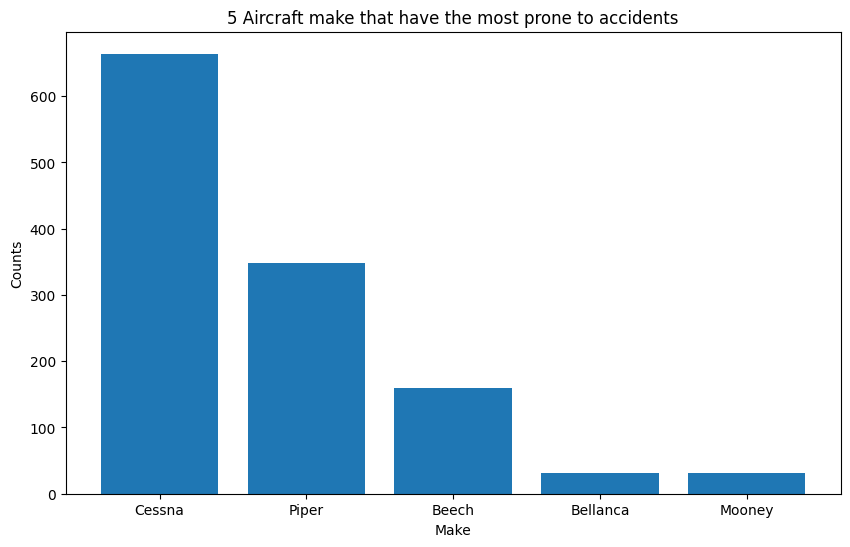

In [223]:
aircraft_figure,ax=plt.subplots(figsize=(10,6))

x=top_5_makes
heights=top_5_count_makes
ax.bar(x,heights)
ax.set_title(bar_chart_title)
ax.set_xlabel(bar_chart_series_label)
ax.set_ylabel(bar_chart_count_label)




After we are able to do that we from the list that we have craeted we should obtain the last in the list cause they not only have 0 injuries but also they dont appear alot in the accidents and incident list

In [226]:
#This will help us to find the aircraft make that have the lowest risk
lowest_risk_aircraft=top_make[-1]
lowest_risk_aircraft

'Wootton, John'

# Conclusin of the Analysis

**The last one in the list seems to be Wootton,John**

In [229]:
#We will be able to give the last five to give a range of Selection
lowest_5_risk_aircraft=top_make[-5:-1]
lowest_5_risk_aircraft

['Mcdonnell-douglas', 'Erco', 'Oldfield', 'Playmate']

The list we have been able to compile

*   Wootton,John
*   Playmate

*   Oldfield
*   Erco

*  Mcodonnell-douglas








# Recommendation

As you are about to start yourwe have been able to give you the lsit that we think is most suitable for you according to your prefference and you can also vist the various place to see which one suits you
Most of the aircrafts can be used for diffrent purpose either commercial or private purpose
This is the data we were able to present to you as Analytico